In [1]:

#import required for libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.inspection import DecisionBoundaryDisplay
# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score


## Multiple Layer Perceptron - Description

In the following we provide a quick summary of the fundamental concepts
involved with multiple layer perceptron (MLP).


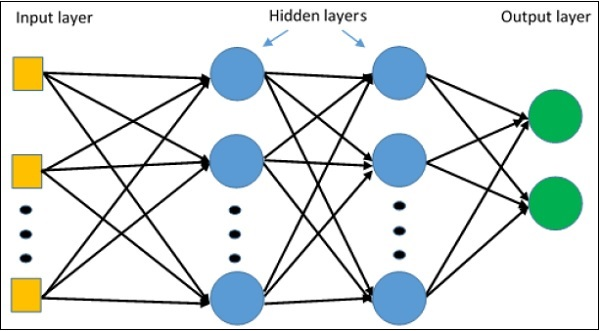


The network consists of neurons which form layers. these layers are
called the input layer, hidden layers and output layer. often the
number of neurons in the input layer corresponds to the number of
features. The neurons in this layer simply pass their value to the next
layer. The hidden layers facilitate the magic of neural networks and the
output layer is where the model, you guessed it, outputs the solution.

The following equation is the mathematical representation of going from
input to output in a neural network.

$$
\hat{y}= \sigma\left( w^{T}x+b \right)
$$

Here $u$ is the transposed vector of weights, $x$ the value of the
previous neuron and $b$ a bias. $\sigma$ is the main focus of this
researchquestion. more on this later. The goal of learning in this
context is to tune hyperparameters to minimise the sum of all errors
between $\hat{y}$ and target $y$.




Each example is led trough the network, this is called
forwardpropagation. The model produces an output which, because MLP is a
supervised method, we can compare to the expected output and construct
an average-cost-function. The goal is now to adjust weights and biases
to minimise this function via a process called backpropagation.

$$
AL(w^{T},b) = \frac{1}{m}\sum_{i=1}^{m} L \left( \hat{y}^{(i)}, y^{(i)} \right)
$$


Function L represents the way the loss for each example is calculated.
Commonly used loss-functions are regression mean squared error (MSE) for
regression problems and binary cross-entropy or binary classification.


$$
MSE = \left( y_i - \hat{y}_i  \right)^2
$$
$$
\text{Binary cross-entropy} = - \left( y_i \log{ \left( \hat{y}_i \right) } + \left( 1 - y_i \right) \log{ \left( 1 - \hat{y}_i \right)}  \right)
$$




## How do different activation functions compare for classification using large MLP?

To begin, below we introduce the different activation functions which are the subject of this study. There are dozens of activation functions, each with its advantages and disadvantages. For this study, we will focus on the four best known ones. Understanding and comparing their fundamental properties nicely underlines the importance of choosing a good activation function in practice.

In [103]:
def visualize_function_and_derivative(func, derivative, label):
    x = np.linspace(-10, 10)
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    axes[0].set_title(f'{label} Activation Function', fontweight="bold")
    axes[0].set_xlabel('x')
    axes[0].set_ylabel(f'{label}(x)')
    axes[0].plot(x, func(x))
    axes[0].grid(True)  # Enable gridlines
    
    axes[1].set_title(f'{label} Derivative Function', fontweight="bold")
    axes[1].set_xlabel('x')
    axes[1].set_ylabel(f'{label}(x)')
    axes[1].plot(x, derivative(x))
    axes[1].grid(True)  # Enable gridlines
    
    plt.tight_layout()
    plt.show()

### Linear activation

In [104]:
def linear(x):
    ''' y = f(x) It returns the input as it is'''
    return x

In [105]:
def linear_derivative(x):
    ''' The derivative always outputs 1'''
    return np.ones_like(x)

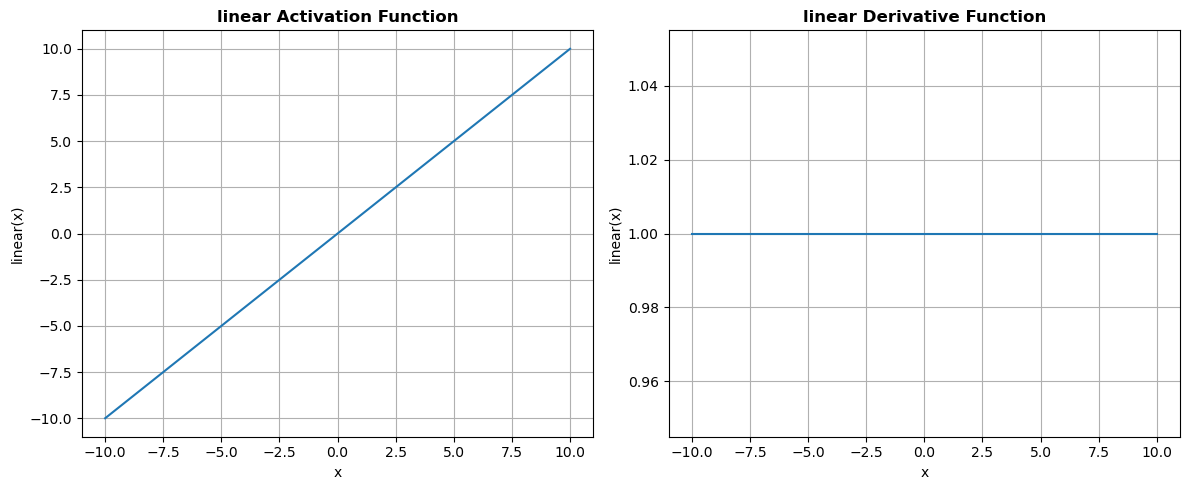

In [106]:
visualize_function_and_derivative(linear, linear_derivative, "linear")

The linear activation function also known as the identity function is probably the most easy to understand function, it just maps the input to itself so has no effect on the weighted sum of the input. 

$$
f \left( x \right) = x
$$

### Sigmoid Activation

In [126]:
def sigmoid(x):
    ''' It returns 1/(1+exp(-x)). where the values lies between zero and one '''
    return 1/(1+np.exp(-x))

In [127]:
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

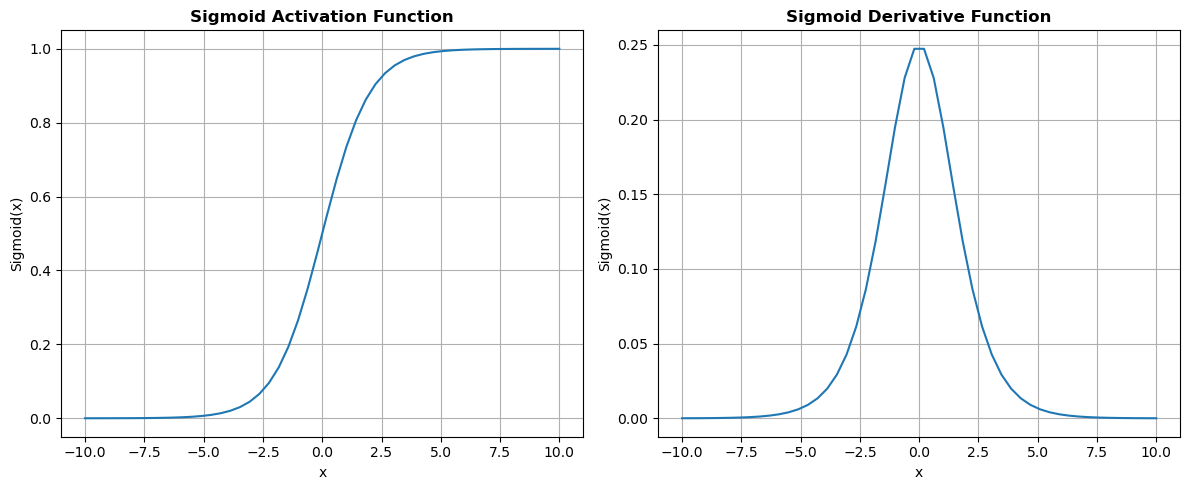

In [129]:
visualize_function_and_derivative(sigmoid, sigmoid_derivative, "Sigmoid")

The sigmoid function compresses to any real value input to a $[0, 1]$ range. The larger the input becomes, the closer the output approaches 1.  The ouput approaches 0 when the input becomes smaller.

$$
f(x) = \frac{1}{1 + e^{-x}}
$$

### Tanh Activation

In [130]:
def tanh(x):
    return np.tanh(x)

In [131]:
def tanh_derivative(x):
    return 1 - np.tanh(x)**2

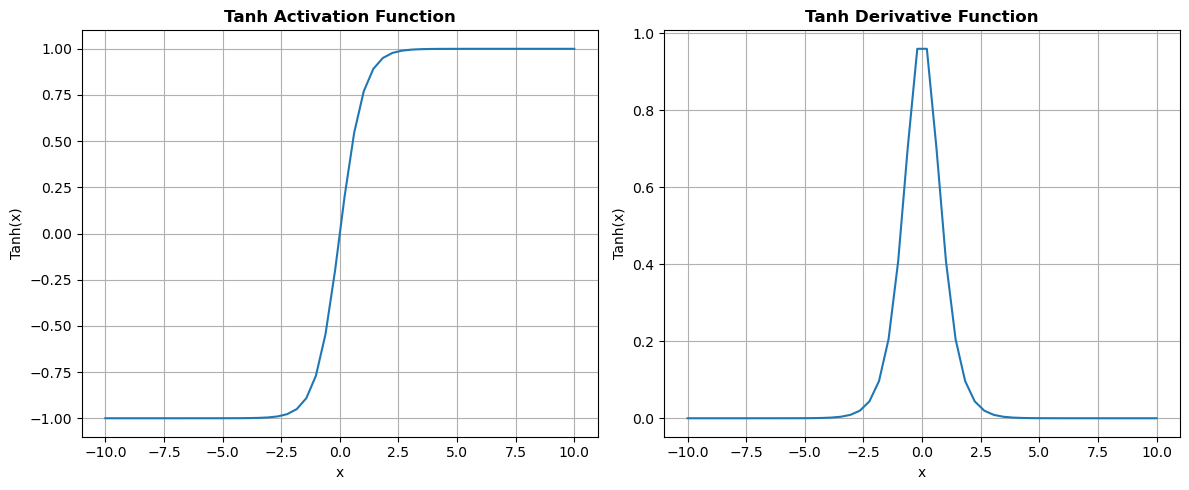

In [132]:
visualize_function_and_derivative(tanh, tanh_derivative, "Tanh")

The behavior of the Tanh activation function has mostly the same charasteristics as the sigmoid function. The most important difference is than when using tanh the input is mapped to a $[-1, 1]$ range.

$$
f(x) = \frac{(e^x - e^{-x})}{(e^x + e^{-x})}
$$


### RELU Activation

In [133]:
def relu(x):
    ''' It returns zero if the input is less than zero otherwise it returns the given input. '''
    x1=[]
    for i in x:
        if i<0:
            x1.append(0)
        else:
            x1.append(i)
    return x1

In [134]:
def relu_derivative(x):
    return np.greater(x, 0.).astype(np.float32)

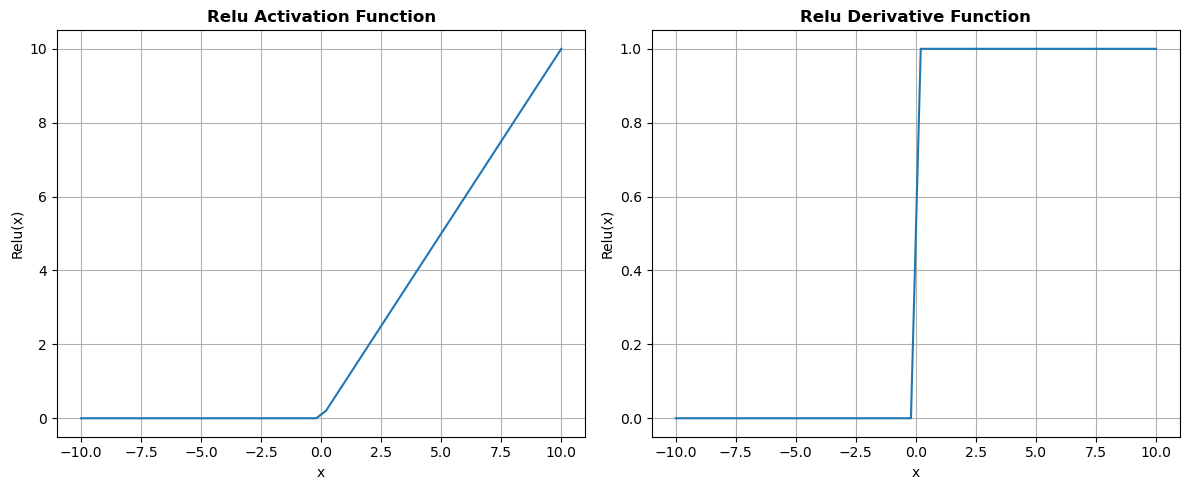

In [135]:
visualize_function_and_derivative(relu, relu_derivative, "Relu")

Relu outputs 0 for all negative inputs and the identity of the input for all positive inputs. 

$$
f(x) = max(0, x)
$$

# Comparison

## Using synthetic data

https://www.geeksforgeeks.org/python-generate-test-datasets-for-machine-learning/

https://www.v7labs.com/blog/neural-networks-activation-functions#:~:text=What%20is%20a%20Neural%20Network%20Activation%20Function%3F,prediction%20using%20simpler%20mathematical%20operations.



In [11]:
from IPython.core.display import HTML as Center
#force notebook to allign graphs for esthetics
Center(""" <style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style> """)

In [12]:
#discard warnings produced by model training
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [13]:
def get_trained_model_list(x_train, y_train):
    params = {
        #'hidden_layer_sizes': (200, 200),
        'hidden_layer_sizes': (150, 200),
        'random_state' : 20,
        'max_iter' : 3000,
        'n_iter_no_change' : 3000,
        'early_stopping' : True
    }
    MLP_iden_model = MLPClassifier(**params, activation='identity').fit(x_train, y_train)
    MLP_logi_model = MLPClassifier(**params, activation='logistic').fit(x_train, y_train)
    MLP_tanh_model = MLPClassifier(**params, activation='tanh').fit(x_train, y_train)
    MLP_relu_model = MLPClassifier(**params, activation='relu').fit(x_train, y_train)
    return MLP_iden_model, MLP_logi_model, MLP_tanh_model, MLP_relu_model

In [29]:
def visualize_decision_boundaries(model_list, x_train):
    figure, ax = plt.subplots(2, 2, figsize=(9.84,9.84))
    ax = ax.T.flatten()
    i = 0
    
    for classifier in model_list:
        
        disp = DecisionBoundaryDisplay.from_estimator(classifier, 
                                                      x_train, 
                                                      response_method="predict",
                                                      xlabel="x_1", ylabel="x_2",
                                                      alpha=0.5, 
                                                      cmap=plt.cm.coolwarm,
                                                      ax=ax[i])
        disp.ax_.scatter(x_train[:, 0], x_train[:, 1], c=y_train, edgecolor="k", cmap=plt.cm.coolwarm)
        disp.ax_.set_title(f"MLP using {classifier.activation}, MSE in sample: {round(classifier.loss_, 3)}")
        i += 1
        
    plt.show()  
    

In [15]:

def visualize_combined_plots(model_list):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Visualize validation scores
    axes[0].set_title('Validation Scores During Training')
    axes[0].set_xlabel('Iteration')
    axes[0].set_ylabel('Accuracy')
    for classifier in model_list:
        validation_scores = classifier.validation_scores_
        tag = classifier.activation
        axes[0].plot(validation_scores, label=tag)
    axes[0].legend()

    # Visualize loss curve
    axes[1].set_title('Loss Curve During Training')
    axes[1].set_xlabel('Iteration')
    axes[1].set_ylabel('Loss')
    for classifier in model_list:
        loss_curve = classifier.loss_curve_
        tag = classifier.activation
        axes[1].plot(loss_curve, label=tag)
    axes[1].legend()

    plt.tight_layout()
    plt.show()


### 2.1 Circle like data

In [27]:
# Import necessary libraries
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
# Generate 2d classification dataset -- Circle like
X, y = make_circles(n_samples=200, shuffle=True,
                    noise=0.1, random_state=1)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=4)
trained_models = get_trained_model_list(x_train, y_train)



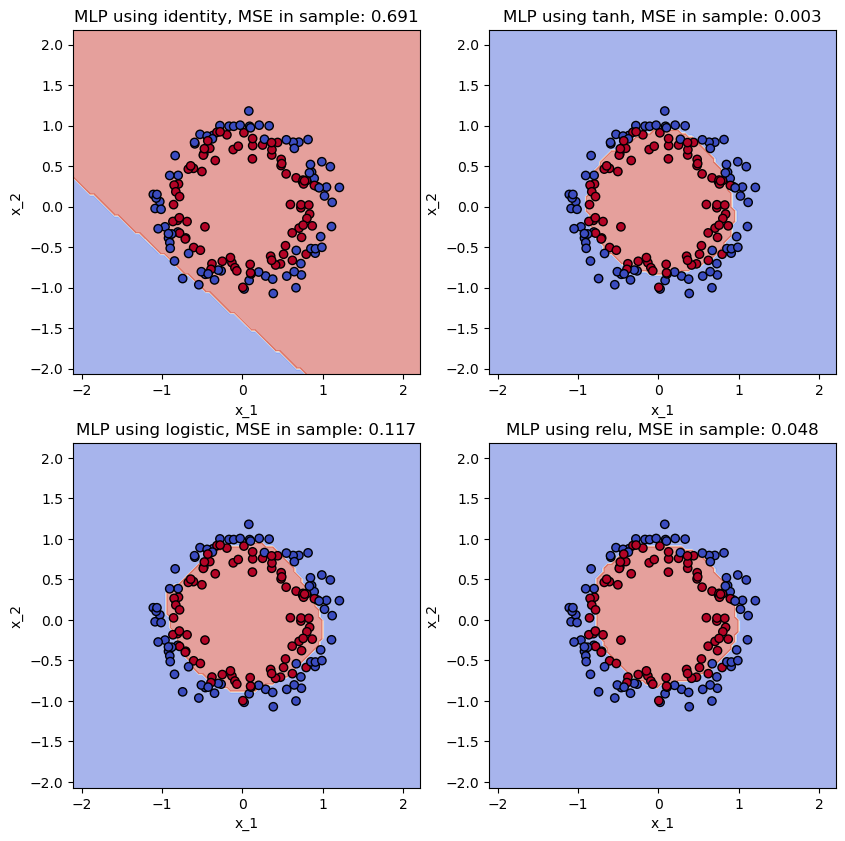

In [30]:
visualize_decision_boundaries(trained_models, x_train)

The synthetic data consists of an inner, predominantly red labelled, and an outer, predominantly blue labelled data points. The figure above visualises the discussion boundaies of the trained model for each activation function used. We see that only for using the identity function is the model unable to fit the data points. Of course, this is hardly surprising since this data is not linearly splittable and this activation function can only obtain a linear function.

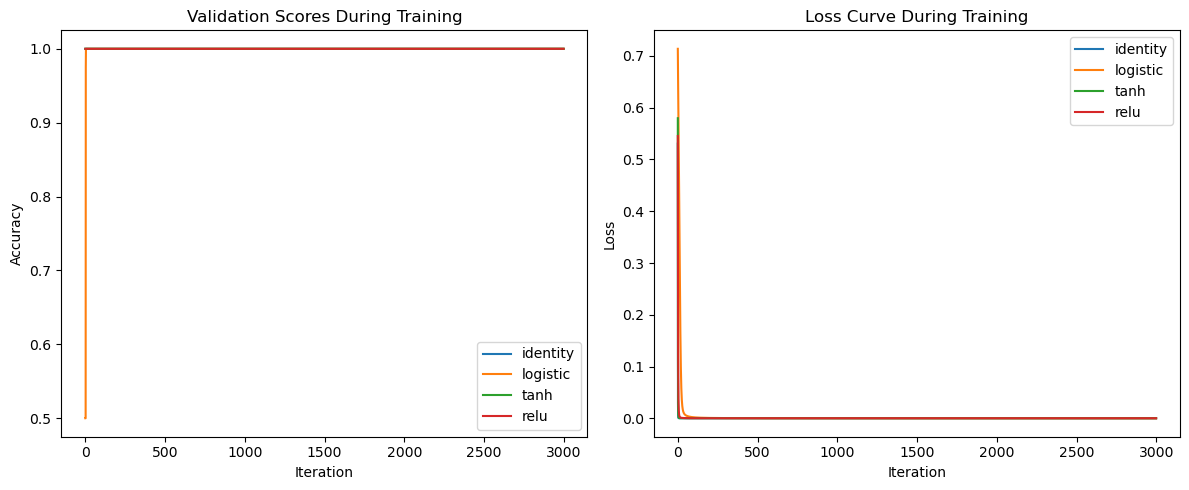

In [38]:
visualize_combined_plots(trained_models)

In line with the above findings on the inadequacy of the identity function, we see in the loss curve visualisation that this model is unable to reduce the loss. What is interesting here is that using the logistic function it takes significantly more time to converge compared to tanh and relu. Why? The answer lies in the properties of this function. As discussed in the introduction, backpropagation and thus learning uses derivations to facilitate gradient descent. The gradients for inputs outsite the [-4, 4] range are near 0. Multiple layers in a network (like the one used here) cause the convergence of the partial derivation of the loss function to 0. The weights of the neurons change only slightly as the gradient gets smaller which slows down learning enormously or sometimes even makes it impossible. This is called the vanishing gradient problem.

$$
\frac{d}{dx}\sigma\left(x  \right) = \sigma\left( x \right)\left(1 - \sigma\left( x \right) \right)
$$

But then, why not just forget about the existence of the sigmoid function? Because this function also has some good uses. Because the out always lies between 0 and 1, this function can be used in the final layer to represent probabilities. There is also a computationally interesting property in the derivation of this function. The derivative of the sigmoid function is can be calculated using the formula above. The necessary $\sigma\left( x \right)$ was already calculated during feedforward and so a lot of time can be saved for this calculation.

### 2.2 Interlocked cresent like data

In [32]:
#import the necessary libraries
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
# generate 2d classification dataset - Moon like
X, y = make_moons(n_samples=500, shuffle=True,
                  noise=0.15, random_state=42)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=4)
trained_models = get_trained_model_list(x_train, y_train)

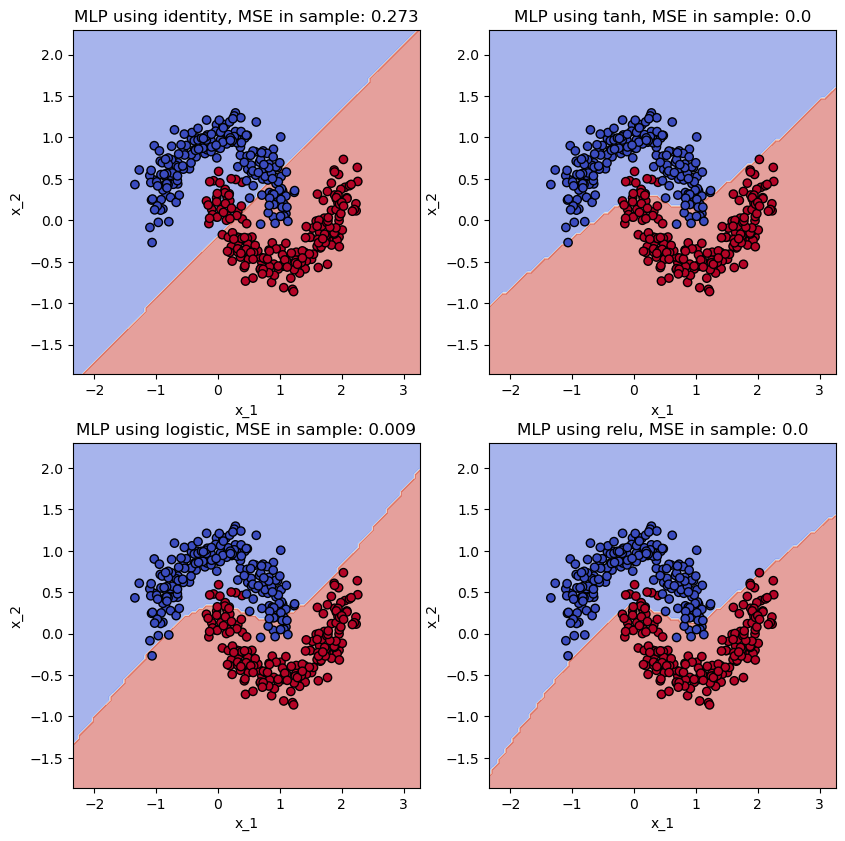

In [33]:
visualize_decision_boundaries(trained_models, x_train)

This data consists of 2 interlocking semi-circles. Both predominantly consisting of one type of label. You can clearly see that a strongly varying function is needed to classify this data correctly. Like the data discussed above, this data is also not linearly classifiable so a model with the identity function does not help us here.

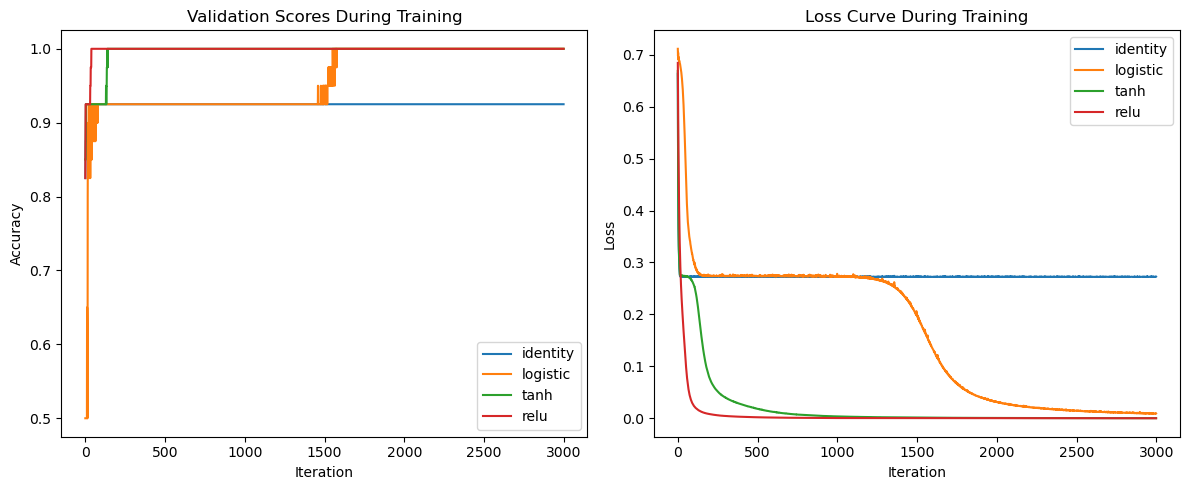

In [34]:
visualize_combined_plots(trained_models)

Again, the slow convergence of the sigmoid function is immediately noticeable. This is another case of the vanishing gradient problem here. What is also striking is that both here and in the previous example, tanh and relu both converge quickly. Why do these functions converge so much faster than the sigmoid function? This can mainly be attributed to the fact that both tanh and relu have much steeper gradients. Because of these steeper gradients, larger steps can be taken during backpropagation during gradient descent and learning is faster. This also gives a huge advantage because this way the gradient is harder to disappear.

### 2.2 Linear seperable data

In [136]:

#import the necessary libraries
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
 
# Generate 2d classification dataset -linear classifieble
X, y = make_blobs(n_samples=500, centers=2, n_features=2, random_state=23)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=4)
trained_models = get_trained_model_list(x_train, y_train)

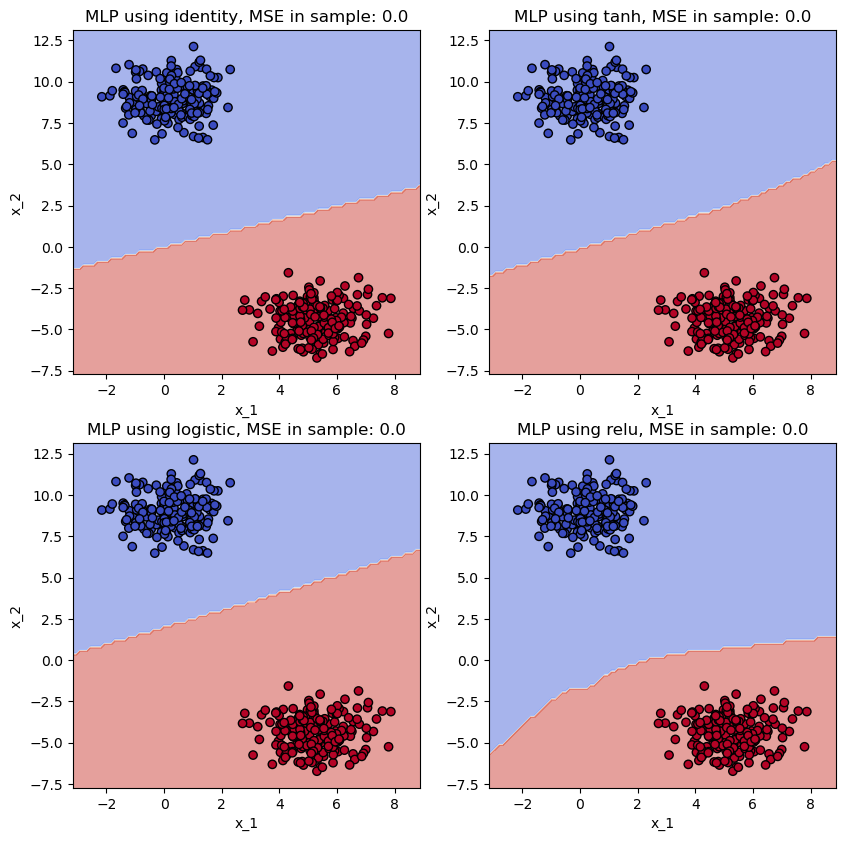

In [36]:
visualize_decision_boundaries(trained_models, x_train)

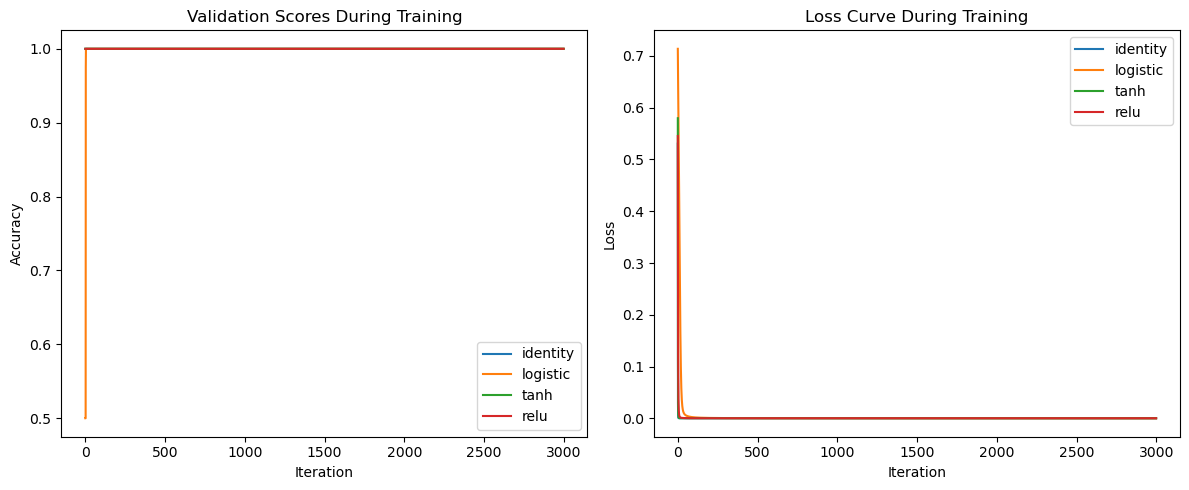

In [37]:
visualize_combined_plots(trained_models)

## Using real-world data

In [143]:
def get_trained_model_list_real(x_train, y_train):
    params = {
        #'hidden_layer_sizes': (200, 200),
        'hidden_layer_sizes': (150, 200),
        'random_state' : 20,
        'n_iter_no_change' : 3000,
        'early_stopping' : True
    }
    MLP_iden_model = MLPClassifier(**params, activation='identity').fit(x_train, y_train)
    MLP_logi_model = MLPClassifier(**params, activation='logistic').fit(x_train, y_train)
    MLP_tanh_model = MLPClassifier(**params, activation='tanh').fit(x_train, y_train)
    MLP_relu_model = MLPClassifier(**params, activation='relu').fit(x_train, y_train)
    return MLP_iden_model, MLP_logi_model, MLP_tanh_model, MLP_relu_model

In [137]:
df = pd.read_csv('./data/anton/Cancer_Data.csv') 
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [138]:
df = df.drop(['Unnamed: 32', 'id'], axis=1)

In [139]:
df['diagnosis'].replace(['B', 'M'],
                        [0, 1], inplace=True)

In [140]:
X, y = df.drop('diagnosis', axis=1), df[['diagnosis']]

In [144]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=4)
trained_models = get_trained_model_list_real(x_train, y_train)

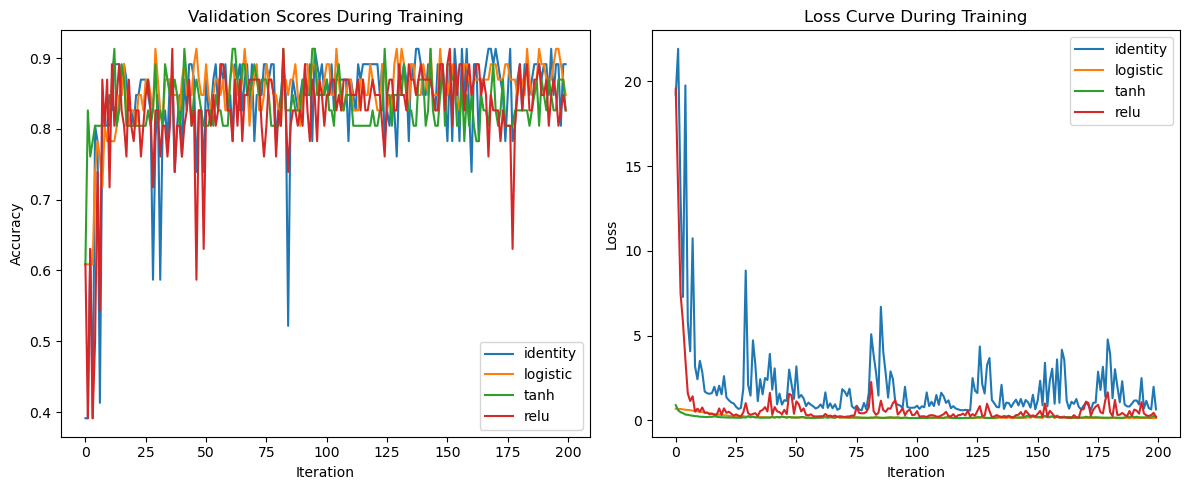

In [145]:
visualize_combined_plots(trained_models)